# Redes Neuronales

<center>
    
<img src='images/Neuron.svg' width=60%\>
</center>

[Fuente Wikipedia](https://commons.wikimedia.org/w/index.php?title=File:Neuron.svg&oldid=343028396)

Una red neuronal es una estructura compuesta por **nodos** o **unidades** que se encuentran interconectados. La potencia de la interconexión entre los nodos se evalúa por medio un valor de **peso**. Si la suma ponderada de todas las conexiones al **nodo** o **neurona** es mayor que un **valor umbral**, decimos que la neurona se **activa**. La función matemática aplicada a la suma ponderada se denomina **función de activación**. 

Se denomina **Modelo de Perceptrón** a una red neuronal con una sola salida.

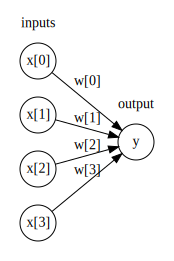

In [2]:
import mglearn
mglearn.plots.plot_logistic_regression_graph()

Sea $\mathbf{X}$ el espacio de entrada que contiene $N$ muestras de datos. Cada muestra está descrita por $d$ características o **features**. Sea $\mathcal{Y} = \{-1, +1\}$ el espacio de salida binario. El perceptrón queda definido por:


    
$h(\mathbf{x}) = sign \left( \sum_{i=1}^{d} \left( w_ix_i \right) + b \right)$

Donde **sign** es la función signo

Sea $\mathbf{w} = \{w_{0},w_{1}, w_{2}, \dots, w_{d} \}^T$ el vector de pesos; en donde $w_{0}=b$ y sea $\mathbf{x} = \{x_{0},x_{1}, x_{2}, \dots, x_{d} \}^T $ con $w_{0}=1$, entonces la expresión para el Perceptron se puede reescribir:

$h(\mathbf{x}) = sign \left(  \mathbf{w}^T \mathbf{x} \right)$

## Algoritmo de aprendizaje del perceptrón
Para realizar el entrenamiento es preciso que las muestras de datos y etiquetas (o valores) sean randomizados. Luega en cada iteración se corregirá los valores del vector $\mathbf{w}$, mediante la siguiente expresión:

$\mathbf{w}(t+1)=\mathbf{w}(t)+\alpha y(t)\mathbf{x}(t)$

## El Perceptron  y la compuerta AND
La compuerta **and** consta de 4 ejemplos. Cada uno con 2 características $d=2$. 


| muestra | x1 | x2 | y  |
|---------|----|----|----|
| 1       | -1 | -1 | -1 |
| 2       | -1 |  1 | -1 |
| 3       |  1 | -1 | -1 |
| 4       |  1 | 1  |  1 |



In [47]:
import numpy as np
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
Y = np.array([-1, -1, -1, 1])
print('X es:\n{}'.format(X))
print('Y es:\n{}'.format(Y))

X es:
[[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]]
Y es:
[-1 -1 -1  1]


In [4]:
from sklearn.linear_model import Perceptron
percept_and = Perceptron(verbose=1, shuffle=True)
percept_and.fit(X, Y)
print('Rendimiento del entrenamiento: {}'.format(percept_and.score(X,Y)))

-- Epoch 1
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 4, Avg. loss: 0.750000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 8, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 12, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 16, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 20, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Rendimiento del entrenamiento: 1.0


/home/leninml/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [5]:
y_pred = percept_and.predict(X)
y_pred

array([-1, -1, -1,  1])

## Ejercicio:
1. Verifique que la Compuerta **XOR** No tiene solución con un Perceptron
2. Verifique que la Computerta **OR** Tiene solución con un Perceptrón
3. Escriba un programa en Python que ejecute el algoritmo de aprendizaje del Perceptrón

## Redes Neuronales Multicapa con Alimentación hacia adelante (Feed Forward)
Al añadir capas ocultas a una estructra de redes neuronales se amplía el espacio de hipótesis. Una red sencilla con una capa oculta con 3 perceptrones es la indicada en la siguiente figura. Observe la estructura de izquiera a derecha formada por:

* Capa de entrada
* Capa oculta
* Capa de Salida

Note que la capa de salida puede tener más nodos.


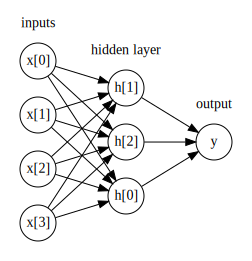

In [6]:
mglearn.plots.plot_single_hidden_layer_graph()


La complejidad del problema puede requerir incrementar el número de capas ocultas. Para entrenar este tipo de redes se necesita el algoritmo de **back propagation** o retropropagación del error, ya que al tener varias neuronas en una capa oculta se dispone de un vector de hipótesis cuyos valores correctos no se conocen previamente. 

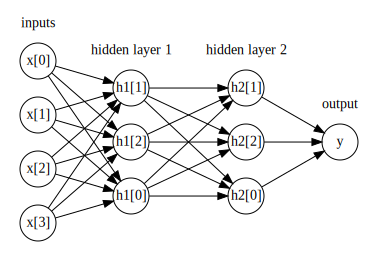

In [7]:
mglearn.plots.plot_two_hidden_layer_graph()

## Ejercicio:
Utilice una red neuronal multicapa para clasificar los datos del dataset moons, con:
* Algoritmo de descenso de gradiente estocástico,
* 50 neuronas en la capa oculta,
* Función de activación relu, luego con sigmoid
* Pruebe con algoritmo lbfgs y sgd 

In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
# print(X[0:5,:])
print(y)
print(len(X))

[1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0
 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0]
100


Realicemos un plot de los datos

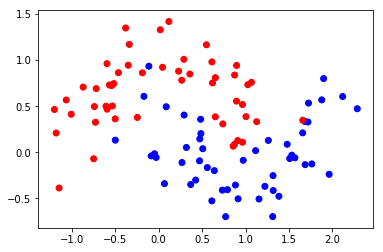

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y, cmap=cm_bright)
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42) #, stratify=y
red = MLPClassifier(hidden_layer_sizes=(50,), 
                    solver='lbfgs', 
#                     learning_rate_init=0.0001, 
#                     activation='relu', 
                    random_state=0, 
                    verbose=True, 
                    max_iter=1000)
history = red.fit(X_train, y_train)

print(len(X_train))

70


In [11]:
X_test

array([[ 1.31702684, -0.2525239 ],
       [ 1.15536561, -0.50593577],
       [ 1.31311917, -0.69665985],
       [ 0.8729088 ,  0.08643291],
       [ 1.72532644,  0.53367598],
       [-0.4993884 ,  0.13192906],
       [ 0.35940317,  0.84867003],
       [-0.16955317,  0.60660877],
       [ 1.50917461, -0.06701048],
       [ 0.36877983, -0.34894509],
       [-0.7280717 ,  0.3259131 ],
       [ 0.77145295, -0.69709227],
       [ 1.00549331,  0.38686701],
       [-0.74872343, -0.06972957],
       [ 1.89948318,  0.79928869],
       [-0.87006365,  0.70686285],
       [ 1.12856036,  0.33191968],
       [ 0.97370054, -0.08631168],
       [ 0.89715307,  0.94175457],
       [-0.51699811,  0.74457804],
       [-0.59385445,  0.46769065],
       [-0.46333991,  0.86330772],
       [ 0.55039452,  1.16554689],
       [-0.60690411,  0.50000529],
       [ 0.42598043, -0.3006242 ]])

La precisión sobre el dataset de entrenamiento es:

In [65]:
acc = red.score(X_train, y_train)
acc

1.0

La precisión sobre el dataset de prueba es:

In [66]:
acc_test = red.score(X_test, y_test)
acc_test

0.8666666666666667

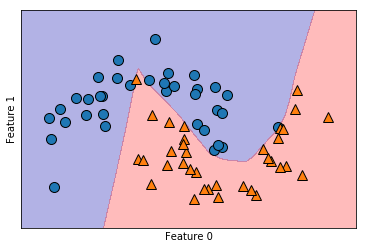

In [70]:
import mglearn
mglearn.plots.plot_2d_separator(red, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")
plt.show()

## Ejercicio
Resuelva el problema del perceptron con 2 neuronas en la capa oculta. Considere utilizar una función de activación apropiada

In [15]:
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
Y = np.array([[-1], [1], [1],[-1] ])

Pruebe el código utiliznado:
1. SGD
2. lbfgs

In [16]:
red_xor = MLPClassifier(hidden_layer_sizes=(2,2),
                        activation='tanh',
                        solver='lbfgs',
                        max_iter=1500, verbose=1)
#lbfgs / lbfgs

Entrenando la red:

In [17]:
red_xor.fit(X, Y)

/home/leninml/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False)

In [18]:
red_xor.score(X, Y)

1.0

In [19]:
y_pred = red_xor.predict(X)
y_pred

array([-1,  1,  1, -1])

In [20]:
y_grafico = [-1, 1, 1, -1]

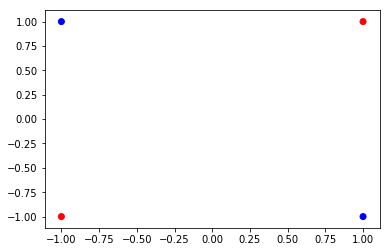

In [21]:
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y_grafico, cmap=cm_bright)
plt.show()

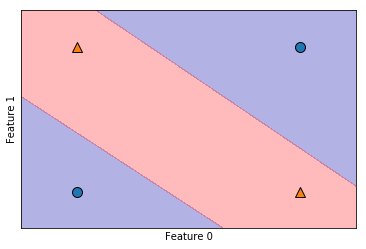

In [22]:
mglearn.plots.plot_2d_separator(red_xor, X, fill=True, alpha=.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y_grafico) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")
plt.show()

## Ejercicios adicionales
Resuelva con una arquitectura de red neuronal feed forward multicapa el dataset iris

## Red Neuronal como Regresión
Considere una función $y = x^2-2x+3$. Para el intervalo de $[-5, 5]$ Obtenga 1000 puntos. Puede hacer que la red neuronal reproduzca esta función en el Intervalo propuesto?

Que pasa si incrementa el dataset a 2000 muestras?

In [23]:
x = np.linspace(-5,5, num=2000)
# x = np.arange(10)
y = x*x-2*x+3


In [24]:
x

array([-5.       , -4.9949975, -4.989995 , ...,  4.989995 ,  4.9949975,
        5.       ])

In [25]:
x = x.reshape(-1,1)

In [26]:
y = y.reshape(-1,1)

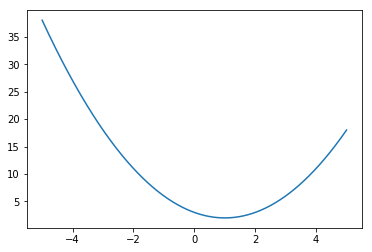

In [27]:
plt.figure()
plt.plot(x,y)
plt.show()

In [28]:
from sklearn.neural_network import MLPRegressor
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
red_funcion = MLPRegressor(hidden_layer_sizes=(500,), solver='adam', activation='relu', verbose=1)
red_funcion.fit(x, y)

/home/leninml/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 102.72146739
Iteration 2, loss = 91.67507298
Iteration 3, loss = 80.79855813
Iteration 4, loss = 70.21359290
Iteration 5, loss = 59.52873038
Iteration 6, loss = 49.17332621
Iteration 7, loss = 39.17911589
Iteration 8, loss = 30.05589102
Iteration 9, loss = 22.13170099
Iteration 10, loss = 15.68461454
Iteration 11, loss = 10.80280250
Iteration 12, loss = 7.31788942
Iteration 13, loss = 5.30866319
Iteration 14, loss = 4.26833852
Iteration 15, loss = 3.76771028
Iteration 16, loss = 3.53851576
Iteration 17, loss = 3.42237284
Iteration 18, loss = 3.32479950
Iteration 19, loss = 3.23269111
Iteration 20, loss = 3.14430071
Iteration 21, loss = 3.06049025
Iteration 22, loss = 2.98391399
Iteration 23, loss = 2.90511158
Iteration 24, loss = 2.83270154
Iteration 25, loss = 2.76281149
Iteration 26, loss = 2.69675328
Iteration 27, loss = 2.63276435
Iteration 28, loss = 2.56992920
Iteration 29, loss = 2.50998481
Iteration 30, loss = 2.45241838
Iteration 31, loss = 2.39688771
Itera

/home/leninml/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False)

In [29]:
red_funcion.score(x_test,y_test)

0.9989574284085255

In [30]:
x_test = np.linspace(-5,5,500)
y_real = x_test*x_test-2*x_test+3
x_test = x_test.reshape(-1,1)
# x_test
y_pred = red_funcion.predict(x_test)

# y_pred

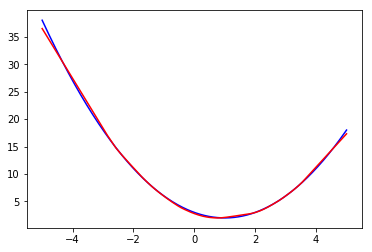

In [31]:
plt.figure()
plt.plot(x_test, y_real, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.show()

¿Qué sucede si deseo calcular para un valor fuera del rango como por ejemplo $x=5.5$?

In [32]:
x_num = 16.
y_num = x_num*x_num-2*x_num+3
y_num

227.0

In [33]:
x_num = np.asarray(x_num)
x_num = x_num.reshape(-1,1)
y_num_pred = red_funcion.predict(x_num)
y_num_pred

array([83.6692473])

## Resolviendo el problema de clasificación del iris dataset
Considere el problema de clasificar las flores iris según la longitud y ancho del sépalo y el pétolo. Resuelva este problema utilizando Redes Neuronales Multicapa

In [34]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
print(iris_dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Los primeros 5 datos del dataset son $\mathbf{\mathcal{X}}:$

In [35]:
iris_dataset['data'][0:5,:]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Las etiquetas para las **muestras** o **samples** anteriores son:

In [36]:
iris_dataset['target'][0:5]

array([0, 0, 0, 0, 0])

Paso los datos del iris dataset a una variable $\mathbf{\mathcal{X}}$

In [37]:
X = iris_dataset['data']
Y = iris_dataset['target']

Codificando las clases como **ONE HOT**

In [38]:
from keras.utils import np_utils
Y_one_hot = np_utils.to_categorical(Y)
Y_one_hot

Using TensorFlow backend.


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

Escalando los valores de $\mathbf{\mathcal{X}}$. Sin embargo primero pruebe el entrenamiento sin escalar los datos.

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
funcion_escalado = scaler.fit(X)
X_escalado = X
# X_escalado = funcion_escalado.transform(X)
print('La media {}'.format(scaler.mean_))
print('Escalado de X, se muestra primeras 5 filas \n{}'.format(X_escalado[0:5,:]))
print('min {}'.format(X_escalado.min()))
print('max {}'.format(X_escalado.max()))
# StandardScaler?

La media [5.84333333 3.05733333 3.758      1.19933333]
Escalado de X, se muestra primeras 5 filas 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
min 0.1
max 7.9


Dividiendo el dataset en train y test. Los datos se deben aleatorizar

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_escalado, Y_one_hot, test_size=0.2, random_state=2)
X_train[0:5,:]

array([[6.2, 2.8, 4.8, 1.8],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.9, 3.6, 1.3],
       [7.7, 3.8, 6.7, 2.2],
       [5.4, 3. , 4.5, 1.5]])

In [41]:
Y_train[0:5]


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

Creando un Modelo de Redes Neuronales Artificiales

In [42]:
red_iris = MLPClassifier(hidden_layer_sizes=(3,),
                        activation='tanh',
                        solver='sgd',
                        momentum=0.95,
                        max_iter=1500, verbose=1)


In [ ]:
Ajuste de Modelo

In [43]:
red_iris.fit(X_train, Y_train)

Iteration 1, loss = 2.72180080
Iteration 2, loss = 2.71866401
Iteration 3, loss = 2.71408659
Iteration 4, loss = 2.70815287
Iteration 5, loss = 2.70094656
Iteration 6, loss = 2.69255084
Iteration 7, loss = 2.68304850
Iteration 8, loss = 2.67252214
Iteration 9, loss = 2.66105434
Iteration 10, loss = 2.64872782
Iteration 11, loss = 2.63562552
Iteration 12, loss = 2.62183057
Iteration 13, loss = 2.60742612
Iteration 14, loss = 2.59249500
Iteration 15, loss = 2.57711914
Iteration 16, loss = 2.56137878
Iteration 17, loss = 2.54535152
Iteration 18, loss = 2.52911111
Iteration 19, loss = 2.51272620
Iteration 20, loss = 2.49625906
Iteration 21, loss = 2.47976438
Iteration 22, loss = 2.46328834
Iteration 23, loss = 2.44686792
Iteration 24, loss = 2.43053071
Iteration 25, loss = 2.41429510
Iteration 26, loss = 2.39817099
Iteration 27, loss = 2.38216090
Iteration 28, loss = 2.36626136
Iteration 29, loss = 2.35046465
Iteration 30, loss = 2.33476051
Iteration 31, loss = 2.31913794
Iteration 32, los

Iteration 449, loss = 1.18413413
Iteration 450, loss = 1.18364889
Iteration 451, loss = 1.18316563
Iteration 452, loss = 1.18268434
Iteration 453, loss = 1.18220500
Iteration 454, loss = 1.18172762
Iteration 455, loss = 1.18125217
Iteration 456, loss = 1.18077865
Iteration 457, loss = 1.18030703
Iteration 458, loss = 1.17983733
Iteration 459, loss = 1.17936951
Iteration 460, loss = 1.17890357
Iteration 461, loss = 1.17843951
Iteration 462, loss = 1.17797730
Iteration 463, loss = 1.17751694
Iteration 464, loss = 1.17705841
Iteration 465, loss = 1.17660172
Iteration 466, loss = 1.17614684
Iteration 467, loss = 1.17569376
Iteration 468, loss = 1.17524248
Iteration 469, loss = 1.17479298
Iteration 470, loss = 1.17434526
Iteration 471, loss = 1.17389930
Iteration 472, loss = 1.17345510
Iteration 473, loss = 1.17301264
Iteration 474, loss = 1.17257192
Iteration 475, loss = 1.17213292
Iteration 476, loss = 1.17169563
Iteration 477, loss = 1.17126005
Iteration 478, loss = 1.17082616
Iteration 

Iteration 889, loss = 1.06970229
Iteration 890, loss = 1.06954550
Iteration 891, loss = 1.06938881
Iteration 892, loss = 1.06923222
Iteration 893, loss = 1.06907573
Iteration 894, loss = 1.06891934
Iteration 895, loss = 1.06876304
Iteration 896, loss = 1.06860684
Iteration 897, loss = 1.06845072
Iteration 898, loss = 1.06829470
Iteration 899, loss = 1.06813876
Iteration 900, loss = 1.06798291
Iteration 901, loss = 1.06782715
Iteration 902, loss = 1.06767146
Iteration 903, loss = 1.06751585
Iteration 904, loss = 1.06736032
Iteration 905, loss = 1.06720487
Iteration 906, loss = 1.06704949
Iteration 907, loss = 1.06689418
Iteration 908, loss = 1.06673894
Iteration 909, loss = 1.06658377
Iteration 910, loss = 1.06642867
Iteration 911, loss = 1.06627363
Iteration 912, loss = 1.06611865
Iteration 913, loss = 1.06596373
Iteration 914, loss = 1.06580888
Iteration 915, loss = 1.06565407
Iteration 916, loss = 1.06549932
Iteration 917, loss = 1.06534463
Iteration 918, loss = 1.06518998
Iteration 

Iteration 1332, loss = 0.99096778
Iteration 1333, loss = 0.99073029
Iteration 1334, loss = 0.99049227
Iteration 1335, loss = 0.99025370
Iteration 1336, loss = 0.99001459
Iteration 1337, loss = 0.98977493
Iteration 1338, loss = 0.98953471
Iteration 1339, loss = 0.98929395
Iteration 1340, loss = 0.98905262
Iteration 1341, loss = 0.98881073
Iteration 1342, loss = 0.98856828
Iteration 1343, loss = 0.98832526
Iteration 1344, loss = 0.98808166
Iteration 1345, loss = 0.98783750
Iteration 1346, loss = 0.98759275
Iteration 1347, loss = 0.98734743
Iteration 1348, loss = 0.98710152
Iteration 1349, loss = 0.98685502
Iteration 1350, loss = 0.98660793
Iteration 1351, loss = 0.98636025
Iteration 1352, loss = 0.98611196
Iteration 1353, loss = 0.98586308
Iteration 1354, loss = 0.98561359
Iteration 1355, loss = 0.98536349
Iteration 1356, loss = 0.98511279
Iteration 1357, loss = 0.98486146
Iteration 1358, loss = 0.98460952
Iteration 1359, loss = 0.98435695
Iteration 1360, loss = 0.98410375
Iteration 1361

/home/leninml/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.95,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False)

Evaluando el desempeño de entrenamiento de la Red Iris

In [44]:
red_iris.score(X_train, Y_train)

0.8583333333333333

Evaluando el desempeño de la Red Iris en el dataset de Prueba

In [45]:
red_iris.score(X_test, Y_test)

0.8333333333333334

Dibujando la función de pérdida

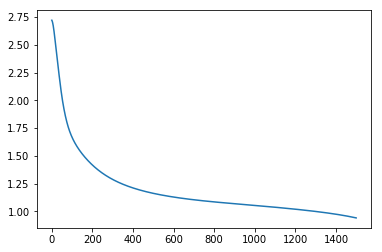

In [46]:
import matplotlib.pyplot as plt
cost_function = red_iris.loss_curve_
plt.figure()
plt.plot(cost_function)
plt.show()